# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [22]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./data/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

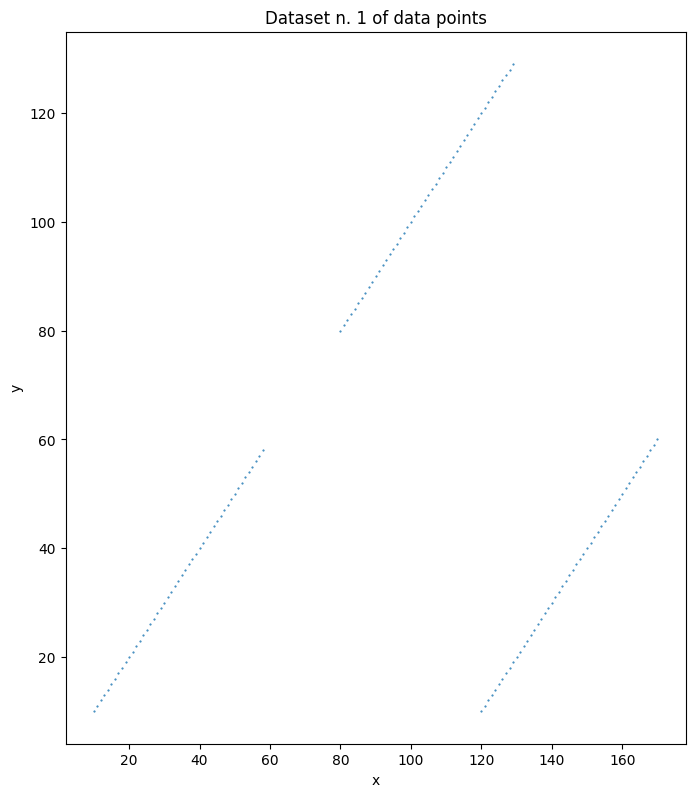

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

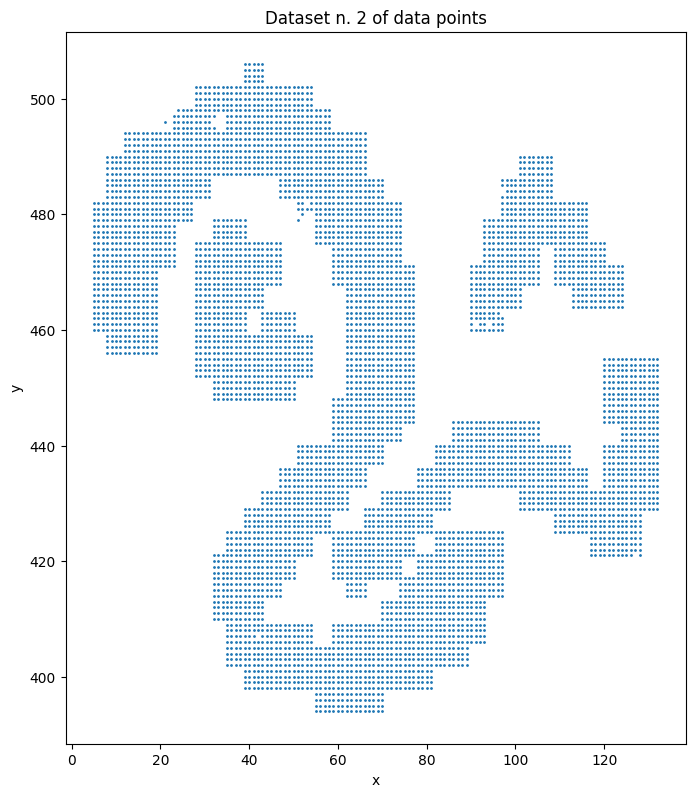

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

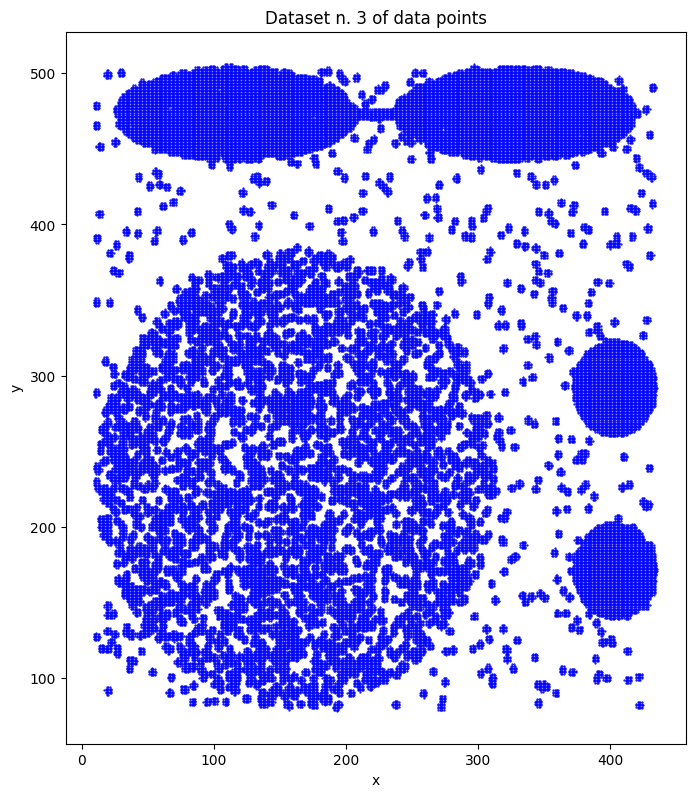

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

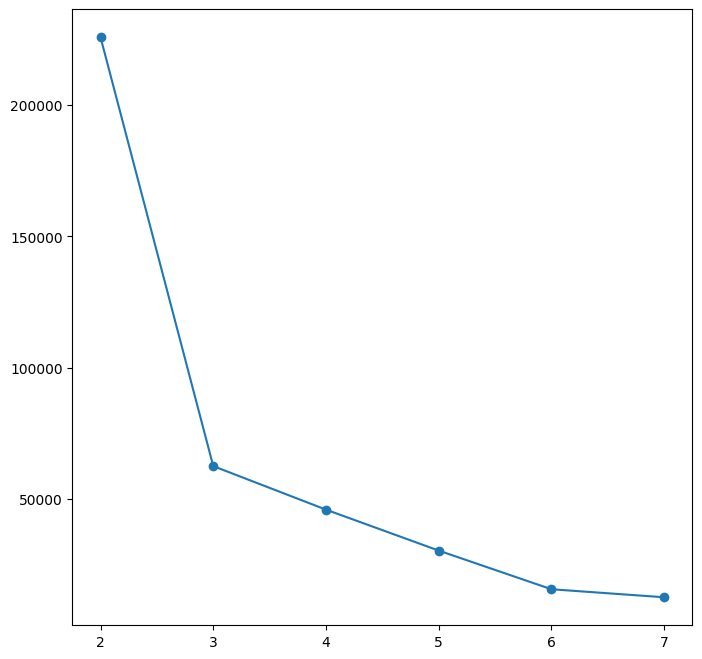

In [26]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)  

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./data/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

inertias = []
for k in range(2,8):
    kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)
    inertias.append(kmeans1.inertia_)

fig = plt.figure(figsize=(8,8))
plt.plot([2,3,4,5,6,7], inertias)
plt.scatter([2,3,4,5,6,7], inertias)

plt.show()

# Best K for data
k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

In the following program we plot the clusters

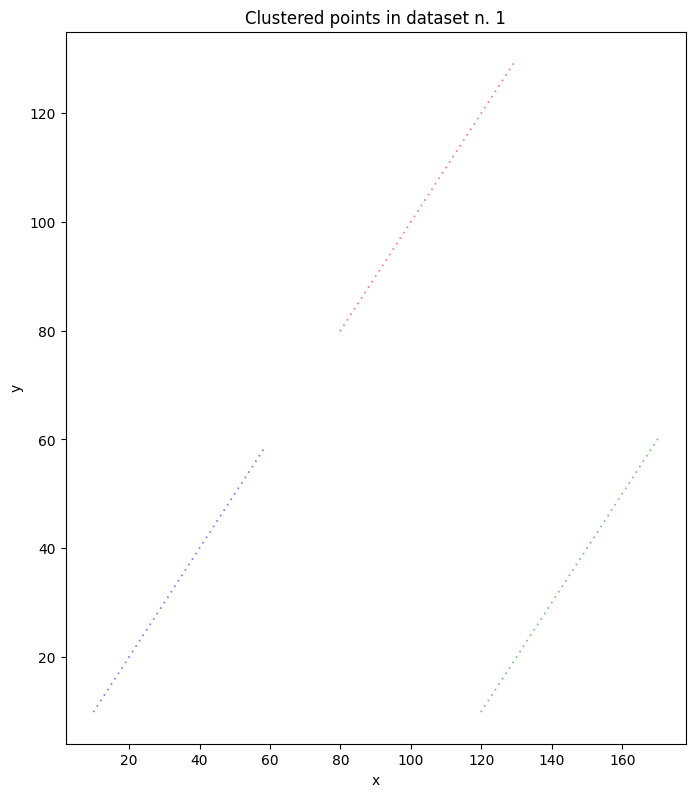

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

## Imports & Utils

In [28]:
import csv
import sys
from os.path import join
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

file_path="./data/"
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"
file_name3="CURE-complete.csv"

np.random.seed(5)
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

def plot_clusters(dataset_n, data, nsamples, kmeans, k):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title(f'Clustered points in dataset n. {dataset_n}')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','w']
        
    #plot the dataset
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i,0] for i in range(nsamples) if kmeans.labels_[i]==clu]
        data_list_y = [data[i,1] for i in range(nsamples) if kmeans.labels_[i]==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

    plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

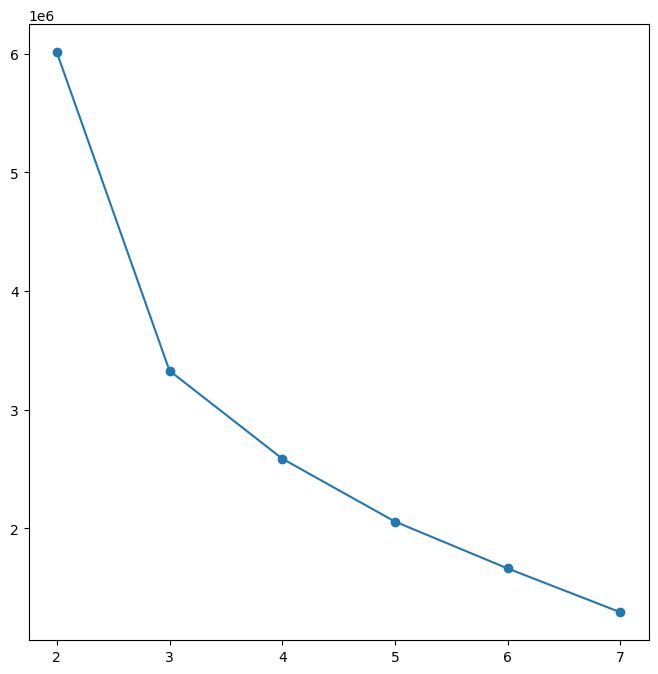

In [29]:
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

inertias = []
for k in range(2,8):
    kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
    inertias.append(kmeans2.inertia_)

fig = plt.figure(figsize=(8,8))
plt.plot([2,3,4,5,6,7], inertias)
plt.scatter([2,3,4,5,6,7], inertias)

plt.show()

best_k = 3
kmeans2 = KMeans(n_clusters=best_k, random_state=0).fit(data2)

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

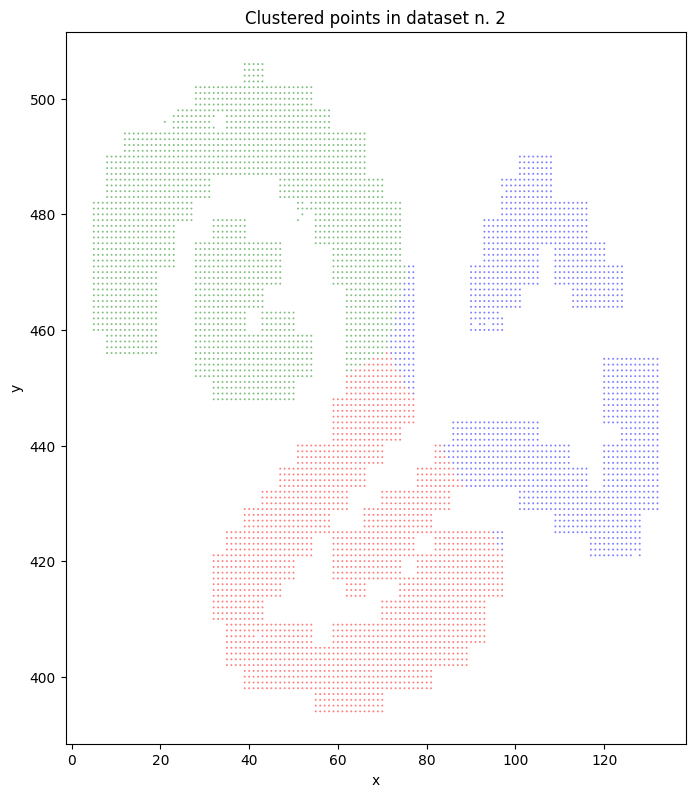

In [30]:
plot_clusters(dataset_n=2, data=data2, nsamples=n_samples2, kmeans=kmeans2, k=best_k)

### Risposta:
- Come ti spieghi quello che succede?
- Quale valore di K usiamo e come mai?
- Misura di valutazione del cluster?

In the following cell I propose you to perform clustering with K-means on the dataset3.

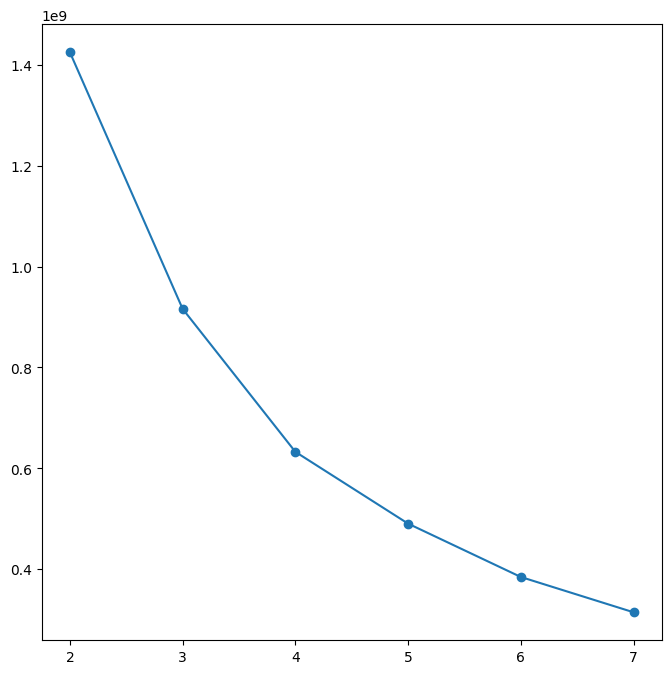

In [31]:
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

inertias = []
for k in range(2,8):
    kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)
    inertias.append(kmeans3.inertia_)

fig = plt.figure(figsize=(8,8))
plt.plot([2,3,4,5,6,7], inertias)
plt.scatter([2,3,4,5,6,7], inertias)

plt.show()

# Best K for data
best_k = 4
kmeans3 = KMeans(n_clusters=best_k, random_state=0).fit(data3)

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

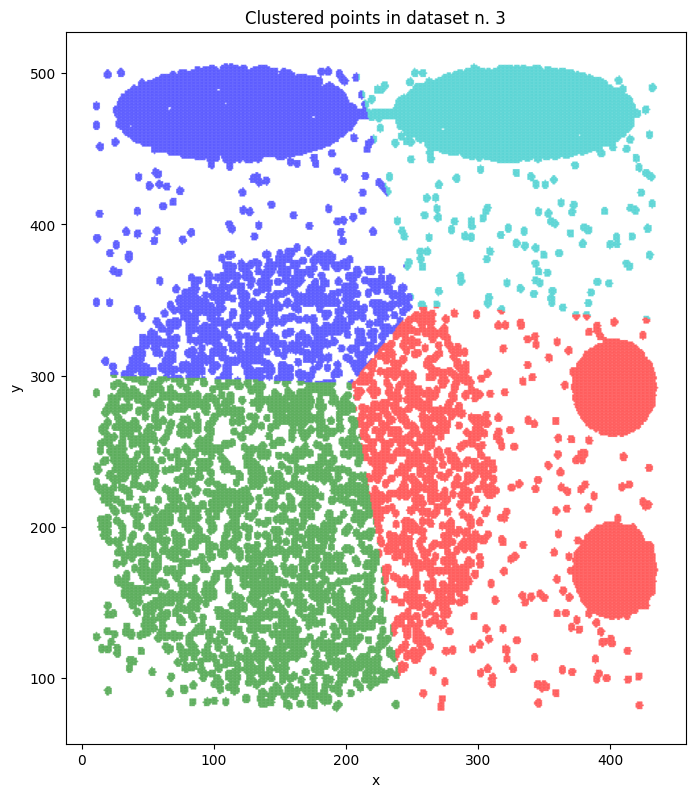

In [32]:
plot_clusters(dataset_n=3, data=data3, nsamples=n_samples3, kmeans=kmeans3, k=best_k)

### Risposta:
- Come ti spieghi quello che succede?
- Quale valore di K usiamo e come mai?
- Misura di valutazione del cluster?


DBSCAN for dataset 1

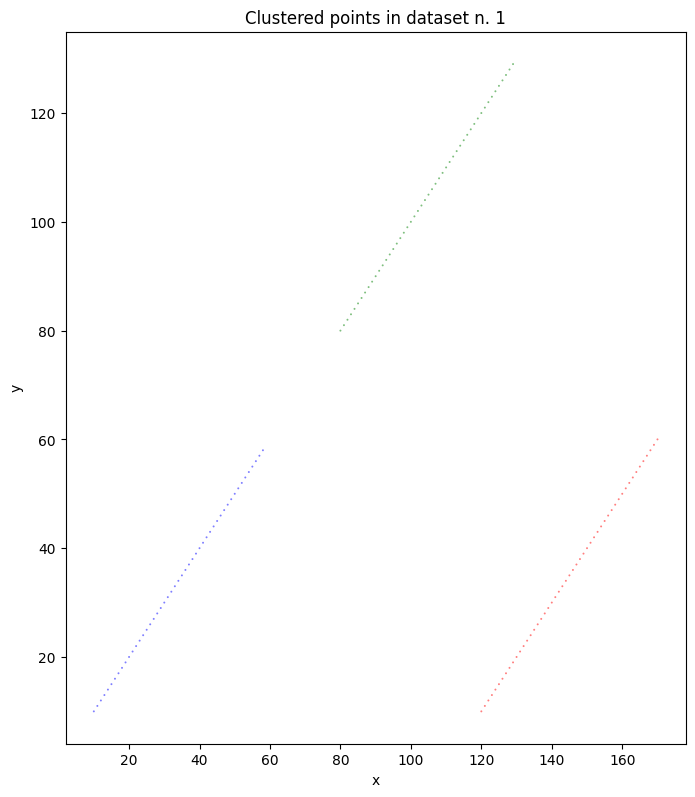

In [33]:
dbscan_1 = DBSCAN(eps=3, min_samples=3).fit(data1)

labels = dbscan_1.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

plot_clusters(dataset_n=1, data=data1, nsamples=n_samples1, kmeans=dbscan_1, k=n_clusters)

DBSCAN for dataset 2

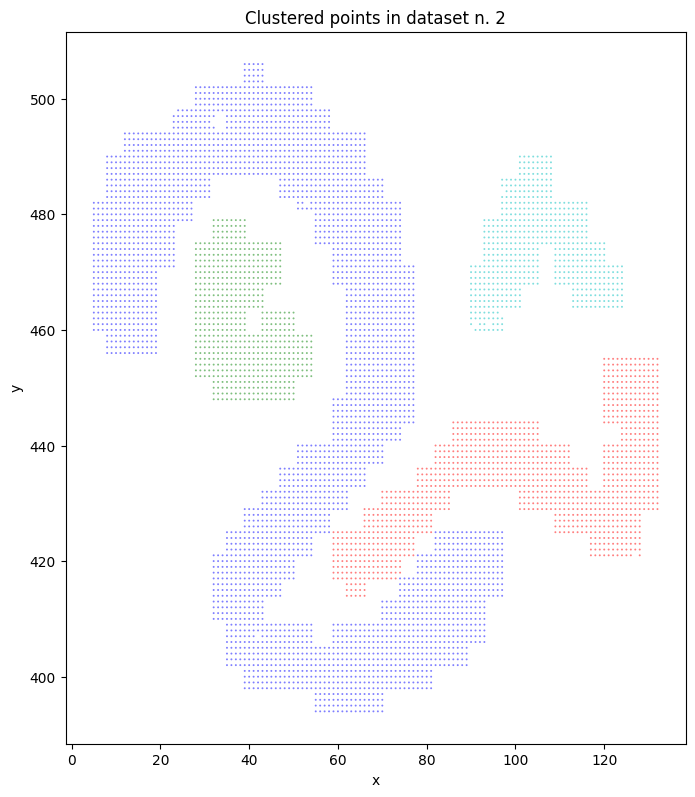

In [34]:
dbscan_2 = DBSCAN(eps=1.4142135623730951, min_samples=8).fit(data2)

labels = dbscan_2.labels_
n_clusters = len(set(labels))

plot_clusters(dataset_n=2, data=data2, nsamples=n_samples2, kmeans=dbscan_2, k=n_clusters)

DBSCAN for dateset 3

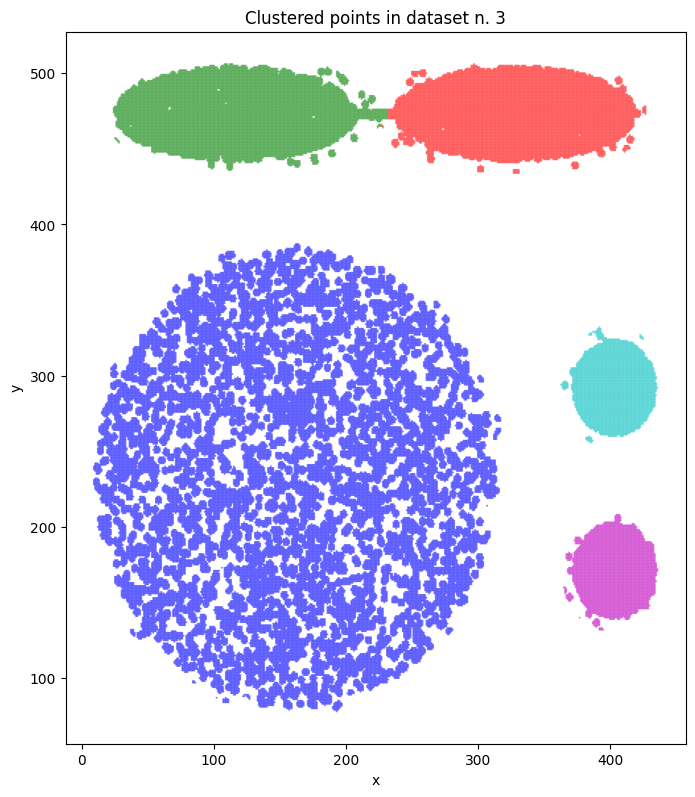

In [59]:
dbscan_3 = DBSCAN(eps=8.94427190999916, min_samples=150).fit(data3)

labels = dbscan_3.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) 

plot_clusters(dataset_n=3, data=data3, nsamples=n_samples3, kmeans=dbscan_3, k=n_clusters)

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [36]:
clusters_x = []
clusters_y = []
for clu in range(n_clusters):
	clusters_x.append([data2[i,0] for i in range(n_samples2) if dbscan_2.labels_[i]==clu])
	clusters_y.append([data2[i,1] for i in range(n_samples2) if dbscan_2.labels_[i]==clu])

Il gomito si trova a: 1.4142135623730951


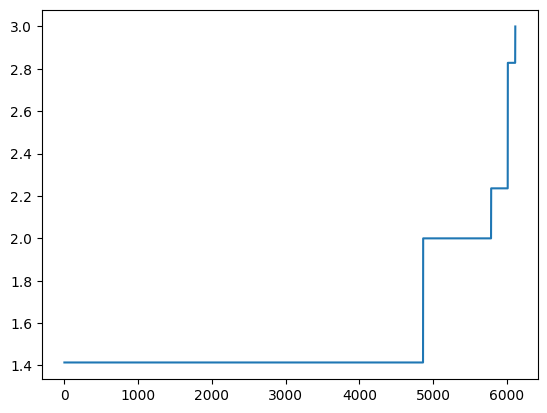

In [37]:
from kneed import KneeLocator

def distance_points(x, y):
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

def compute_reachability_distance(min_pts, clusters_x, clusters_y):
	final_list = []
	for i in range(len(clusters_y)):
		for p_1 in zip(clusters_x[i], clusters_y[i]):
			temp_k_elem = []
			for p_2 in zip(clusters_x[i], clusters_y[i]):
				distance = distance_points(p_1, p_2)
				if distance != 0:
					temp_k_elem.append(distance)
			temp_k_elem.sort()
			final_list.append(temp_k_elem[min_pts-1])
	final_list.sort()
	return final_list

r_distance = compute_reachability_distance(8, clusters_x, clusters_y)


kn = KneeLocator(x=r_distance, y=r_distance, curve='convex', direction='increasing')
print(f"Il gomito si trova a: {kn.knee}")
elbow = kn.knee
plt.plot(r_distance)


Il gomito si trova a: 8.94427190999916


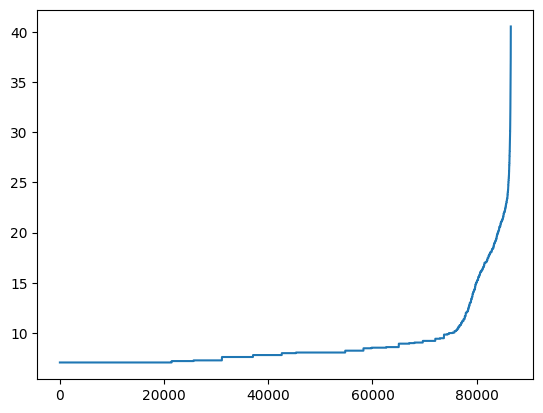

In [62]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=150)
nbrs = neigh.fit(data3)
distances, indices = nbrs.kneighbors(data3)

distances = np.sort(distances, axis=0)
distances = distances[:,149]

kn = KneeLocator(x=distances, y=distances, curve='convex', direction='increasing')
print(f"Il gomito si trova a: {kn.knee}")
elbow = kn.knee
plt.plot(distances)